In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
# from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, 
                                scale=True, beta_initializer='zeros', gamma_initializer='ones',
                                moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, 
                                gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data_underwater/Train'
val = 'c:/Users/jadha/Data/MTP_data_underwater/Val'
test = 'c:/Users/jadha/Data/MTP_data_underwater/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

# Total number of testing images
num_of_test_samples = 0
for testing_dataset in os.listdir(test):
    in_folder_test = test + "/" + testing_dataset
    in_folder_test_list = os.listdir(in_folder_test)
    num_of_test_samples = num_of_test_samples + len(in_folder_test_list)
print("Number of Test samples : ", num_of_test_samples)

Number of Training samples   :  459
Number of Validation samples :  90
Number of Test samples :  53


In [4]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
batch_size = 16
learning_rate = 0.01
epoch = 100

# Defining image width and height respectively
img_rows = 256
img_cols = 256

In [7]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 459 images belonging to 5 classes.
Found 90 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


In [8]:
px=train_generator[4][0][7]
px

array([[[0.5254902 , 0.5254902 , 0.5176471 ],
        [0.52416724, 0.52416724, 0.5163241 ],
        [0.5220324 , 0.5220324 , 0.51418924],
        ...,
        [0.47058827, 0.4666667 , 0.44705886],
        [0.47058827, 0.4666667 , 0.44705886],
        [0.46991664, 0.46599507, 0.44638723]],

       [[0.52497977, 0.52497977, 0.51713663],
        [0.5254902 , 0.5254902 , 0.5176471 ],
        [0.5254902 , 0.5254902 , 0.5176471 ],
        ...,
        [0.47058827, 0.4666667 , 0.44705886],
        [0.47058827, 0.4666667 , 0.44705886],
        [0.46532983, 0.46140826, 0.44180042]],

       [[0.52156866, 0.52156866, 0.5137255 ],
        [0.52349436, 0.52349436, 0.5156512 ],
        [0.5254902 , 0.5254902 , 0.5176471 ],
        ...,
        [0.47058827, 0.4666667 , 0.44705886],
        [0.46751887, 0.4635973 , 0.44398943],
        [0.46274513, 0.45882356, 0.43921572]],

       ...,

       [[0.52156866, 0.5294118 , 0.5176471 ],
        [0.5191818 , 0.5270249 , 0.5152602 ],
        [0.5176471 , 0

In [9]:
px.shape

(256, 256, 3)

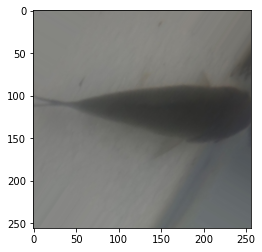

In [10]:
plt.imshow(px)

In [11]:
test_generator.dtype

'float32'

In [12]:
# for i in test_generator:
#         print(i)
test_generator[0][-1]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

# Create model
add new classification layer

In [13]:
steps_per_epoch_vgg19 = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch_vgg19)

Steps per epoch:  28


In [14]:
from keras.applications import vgg19
    # The sequential API allows you to create models layer-by-layer
vgg19_model=Sequential()
vgg19_model.add(vgg19.VGG19(include_top = False, 
                            pooling = 'max', 
                            weights = 'imagenet'))
vgg19_model.add(Dense(5, activation="softmax"))

    # Summary: to find the number of parameters
vgg19_model.layers[0].trainable=False
vgg19_model.summary() 

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg19_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
Total params: 20,026,949
Trainable params: 2,565
Non-trainable params: 20,024,384
_________________________________________________________________


In [15]:
vgg19_training = vgg19_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg19,
                                       epochs = epoch,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size)

Epoch 1/100
28/28 [==============================] - 85s 3s/step - loss: 1.6109 - accuracy: 0.3431 - val_loss: 1.5502 - val_accuracy: 0.2875
Epoch 2/100
28/28 [==============================] - 80s 3s/step - loss: 1.2214 - accuracy: 0.4470 - val_loss: 1.6086 - val_accuracy: 0.4000
Epoch 3/100
28/28 [==============================] - 80s 3s/step - loss: 1.2273 - accuracy: 0.4898 - val_loss: 1.2768 - val_accuracy: 0.5000
Epoch 4/100
28/28 [==============================] - 80s 3s/step - loss: 1.0944 - accuracy: 0.5169 - val_loss: 1.1979 - val_accuracy: 0.5375
Epoch 5/100
28/28 [==============================] - 80s 3s/step - loss: 1.0120 - accuracy: 0.5621 - val_loss: 1.3694 - val_accuracy: 0.4000
Epoch 6/100
28/28 [==============================] - 80s 3s/step - loss: 1.0454 - accuracy: 0.5305 - val_loss: 1.2964 - val_accuracy: 0.4625
Epoch 7/100
28/28 [==============================] - 80s 3s/step - loss: 1.0031 - accuracy: 0.5621 - val_loss: 1.1244 - val_accuracy: 0.4625
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 2251s 83s/step - loss: 0.6734 - accuracy: 0.7314 - val_loss: 1.0004 - val_accuracy: 0.5875
Epoch 60/100
28/28 [==============================] - 75s 3s/step - loss: 0.7134 - accuracy: 0.7065 - val_loss: 0.9254 - val_accuracy: 0.6625
Epoch 61/100
28/28 [==============================] - 74s 3s/step - loss: 0.5628 - accuracy: 0.7765 - val_loss: 1.0973 - val_accuracy: 0.5875
Epoch 62/100
28/28 [==============================] - 81s 3s/step - loss: 0.6510 - accuracy: 0.7472 - val_loss: 1.1166 - val_accuracy: 0.6000
Epoch 63/100
28/28 [==============================] - 85s 3s/step - loss: 0.6416 - accuracy: 0.7246 - val_loss: 1.0056 - val_accuracy: 0.6375
Epoch 64/100
28/28 [==============================] - 94s 3s/step - loss: 0.6927 - accuracy: 0.7065 - val_loss: 0.9955 - val_accuracy: 0.6250
Epoch 65/100
28/28 [==============================] - 90s 3s/step - loss: 0.7149 - accuracy: 0.6930 - val_loss: 0.9542 - val_accuracy: 0.6500
Epo

In [16]:
vgg19_training.history

{'loss': [1.610887050628662,
  1.2213637828826904,
  1.2273197174072266,
  1.0944204330444336,
  1.012034296989441,
  1.0453811883926392,
  1.0030831098556519,
  0.978804349899292,
  0.9543555974960327,
  0.9335663914680481,
  0.8939616084098816,
  0.9721455574035645,
  0.9606013894081116,
  0.8638128638267517,
  0.8700118064880371,
  0.8776378035545349,
  0.8001048564910889,
  0.9191855192184448,
  0.8246961236000061,
  0.8308054208755493,
  0.9091527462005615,
  0.7798164486885071,
  0.7505531907081604,
  0.8140689134597778,
  0.8146459460258484,
  0.8328843712806702,
  0.7759185433387756,
  0.7280538082122803,
  0.7675551772117615,
  0.7494857311248779,
  0.7213683128356934,
  0.8505589962005615,
  0.7803369760513306,
  0.7808002829551697,
  0.7580945491790771,
  0.7236890196800232,
  0.6751023530960083,
  0.6868662238121033,
  0.7060101628303528,
  0.7097392678260803,
  0.719309389591217,
  0.7046354413032532,
  0.7160478234291077,
  0.7059834003448486,
  0.7021563649177551,
  0.62

# Training accuracy

In [18]:
vgg19_model.evaluate(train_generator)

29/29 [==============================] - 63s 2s/step - loss: 0.5288 - accuracy: 0.7952


[0.528791069984436, 0.7952069640159607]

# Validation accuracy

In [19]:
vgg19_model.evaluate(validation_generator)

6/6 [==============================] - 13s 2s/step - loss: 0.9540 - accuracy: 0.6667


[0.9539642333984375, 0.6666666865348816]

# Testing accuracy

In [20]:
vgg19_model.evaluate(test_generator)

4/4 [==============================] - 8s 2s/step - loss: 0.7393 - accuracy: 0.7170


[0.7392953634262085, 0.7169811129570007]

# Prediction

In [21]:
predictions=vgg19_model.predict(test_generator)
predictions

4/4 [==============================] - 8s 2s/step


array([[8.27577174e-01, 8.07953125e-04, 1.71608031e-01, 6.70873033e-06,
        1.07900632e-07],
       [7.08023846e-01, 6.38666039e-04, 1.88040663e-03, 2.89429665e-01,
        2.74494087e-05],
       [6.44121885e-01, 9.56939608e-02, 1.90014109e-01, 7.00588152e-02,
        1.11287482e-04],
       [5.22853673e-01, 2.09428463e-02, 2.09968880e-01, 2.44656235e-01,
        1.57838291e-03],
       [6.61729634e-01, 1.09432675e-01, 1.72265038e-01, 5.64483665e-02,
        1.24286875e-04],
       [6.52658224e-01, 7.05236495e-02, 2.01636761e-01, 7.49411285e-02,
        2.40195135e-04],
       [9.97709632e-01, 1.60645595e-05, 3.65088817e-05, 2.23764568e-03,
        1.69623618e-07],
       [9.38390017e-01, 1.96688299e-04, 6.45281572e-04, 4.24808301e-02,
        1.82872415e-02],
       [9.82433319e-01, 2.09434972e-07, 5.54995324e-07, 1.69522185e-02,
        6.13688549e-04],
       [9.64908004e-01, 1.91810133e-04, 1.20801311e-02, 2.27923337e-02,
        2.77465788e-05],
       [9.88675833e-01, 1.3865

In [22]:
np.argmax(predictions[19])

1

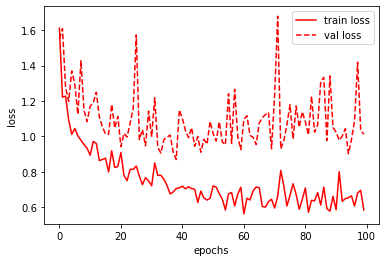

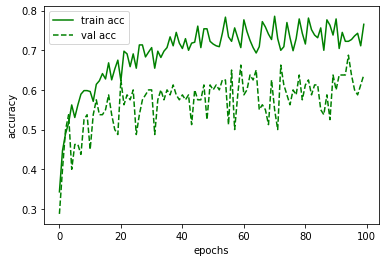

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
plt.plot(vgg19_training.history['loss'], label='train loss',color='r')
plt.plot(vgg19_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg19_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg19_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [24]:
training_accuracy_vgg19      = vgg19_training.history['accuracy'][-1]
training_loss_vgg19          = vgg19_training.history['loss'][-1]
validation_accuracy_vgg19    = vgg19_training.history['val_accuracy'][-1]
validation_loss_vgg19        = vgg19_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg19 )
print("Training Loss VGG        :", training_loss_vgg19)
print("Validation Accuracy VGG  :", validation_accuracy_vgg19)
print("Validation Loss VGG      :", validation_loss_vgg19)

Training Accuracy VGG    : 0.765237033367157
Training Loss VGG        : 0.5847198367118835
Validation Accuracy VGG  : 0.637499988079071
Validation Loss VGG      : 1.012131929397583


In [25]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [26]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg19 = vgg19_model.predict_generator(test_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg19 = np.argmax(Y_pred_vgg19, axis=1)
print('Confusion Matrix')
conf_matrix_vgg19 = confusion_matrix(test_generator.classes, y_pred_vgg19)
cm_vgg19 = np.array2string(conf_matrix_vgg19)
print(conf_matrix_vgg19)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_vgg19 = classification_report(test_generator.classes, y_pred_vgg19, target_names=target_names)
print(class_rep_vgg19)

Confusion Matrix
[[11  0  0  0  0]
 [ 1  8  2  1  0]
 [ 7  1  0  2  0]
 [ 1  0  0 11  0]
 [ 0  0  0  0  8]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.55      1.00      0.71        11
      Mrigal       0.89      0.67      0.76        12
        Rohu       0.00      0.00      0.00        10
     Tilapia       0.79      0.92      0.85        12
        Tuna       1.00      1.00      1.00         8

    accuracy                           0.72        53
   macro avg       0.64      0.72      0.66        53
weighted avg       0.64      0.72      0.66        53



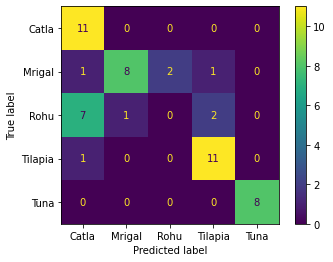

In [27]:
# import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg19,display_labels=target_names)
disp.plot()
plt.show()

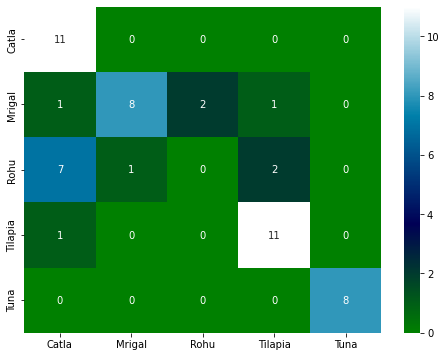

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vgg19 , annot=True, cmap='ocean',xticklabels=target_names,yticklabels=target_names)
plt.show()